# Natural language processing

이 장에서는 문장을 다루는 학습 예제들에 대해 살펴본다. 

## Embedding
임베딩(Embedding)은 자연어 처리에서 단어나 문장을 수치화된 벡터로 변환하는 기술을 말한다.

이러한 임베딩은 단어 간의 의미적 유사성을 보존하면서 컴퓨터가 효과적으로 텍스트를 이해하고 처리할 수 있도록 도와준다.

주로 단어 임베딩은 단어의 의미를 나타내는 다차원 공간에서의 위치로 표현되며, 이를 통해 모델은 단어 간의 관계를 학습하고 문맥을 이해할 수 있다
.
본격적으로 IMDB 예제를 진행하기 앞서, 간단한 embedding example을 살펴보자.

다음의 예제에서는 정수로 구성된 배열을 2차원 실수 벡터들의 배열로 변환한다.

여기서 입력으로 사용하는 정수는 가상의 단어들이라고 생각하면 되고, 출력 결과는 각 단어를 2차원 실수 벡터로 변환한 결과이다.

layer가 훈련된 것이 아니기 때문에 결과 벡터는 무작위로 생성되었을 것이다.

만약 embedding layer를 적절하게 훈련한다면, 비슷한 의미를 가지는 단어들이 비슷한 값의 벡터가 나오도록 신경망을 구성할 수 있을 것이다.

In [12]:
# example : embedding
x = np.array([[1,2,3,4,5,6,7,8,9,9],
              [3,4,1,6,7,8,9,2,0,0],
              [1,1,2,3,2,2,2,2,1,1]])
              
tf.keras.layers.Embedding(input_dim = 10, output_dim = 2, input_length=10)(x)

<tf.Tensor: shape=(3, 10, 2), dtype=float32, numpy=
array([[[ 0.04111023,  0.02856156],
        [ 0.02179558,  0.03033245],
        [ 0.03952059,  0.02329636],
        [ 0.02232749, -0.02355334],
        [ 0.0103115 , -0.03904294],
        [ 0.03914398,  0.03183964],
        [ 0.02244112,  0.04641868],
        [-0.02711848, -0.01407101],
        [-0.04188561, -0.04535853],
        [-0.04188561, -0.04535853]],

       [[ 0.03952059,  0.02329636],
        [ 0.02232749, -0.02355334],
        [ 0.04111023,  0.02856156],
        [ 0.03914398,  0.03183964],
        [ 0.02244112,  0.04641868],
        [-0.02711848, -0.01407101],
        [-0.04188561, -0.04535853],
        [ 0.02179558,  0.03033245],
        [ 0.03410177, -0.04753648],
        [ 0.03410177, -0.04753648]],

       [[ 0.04111023,  0.02856156],
        [ 0.04111023,  0.02856156],
        [ 0.02179558,  0.03033245],
        [ 0.03952059,  0.02329636],
        [ 0.02179558,  0.03033245],
        [ 0.02179558,  0.03033245],
        

이번에는 실제 텍스트로 구성된 문장을 이용해 보자.

다음의 예제에서는 크게 긍정적인 짧은 문장과 부정적인 짧은 문장들을 이용하고 있다.

In [87]:
from numpy import array

# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']

# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# 단어의 최대 숫자
vocab_size = 50

# 단어를 정수로 변환
encoded_docs = [tf.keras.preprocessing.text.one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[9, 32], [39, 39], [24, 43], [17, 39], [46], [35], [8, 43], [43, 39], [8, 39], [43, 26, 32, 15]]


In [86]:
# pad documents to a max length of 4 words
max_length = 4

padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs

array([[ 9, 32,  0,  0],
       [39, 39,  0,  0],
       [24, 43,  0,  0],
       [17, 39,  0,  0],
       [46,  0,  0,  0],
       [35,  0,  0,  0],
       [ 8, 43,  0,  0],
       [43, 39,  0,  0],
       [ 8, 39,  0,  0],
       [43, 26, 32, 15]])

모형은 [`keras.layers.Embedding`](https://keras.io/api/layers/core_layers/embedding/)와 Flatten, 출력층만 있는 매우 간단한 모델이다.

`output_dim = 4`은 임베딩 되는 벡터의 차원을 정의한다.

In [89]:
# define the model
embedding_model = keras.models.Sequential()
embedding_model.add(keras.layers.Embedding(input_dim = vocab_size, output_dim = 4, input_length=max_length))
embedding_model.add(keras.layers.Flatten())
embedding_model.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the model
embedding_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
embedding_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 4, 4)              200       
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 217 (868.00 Byte)
Trainable params: 217 (868.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
# fit the model
embedding_model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = embedding_model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


`padded_docs`를 첫번째 embedding layer에 통과시키면 어떻게 되는지 살펴보자.

In [91]:
padded_docs[:1]

array([[ 9, 32,  0,  0]])

In [92]:
embedding_model.layers[0](padded_docs[:1])

<tf.Tensor: shape=(1, 4, 4), dtype=float32, numpy=
array([[[-0.0288461 ,  0.02631599, -0.08067261,  0.0483021 ],
        [ 0.05453878,  0.03977061,  0.05376922,  0.00091873],
        [-0.00220836, -0.06669747, -0.02379277,  0.00365136],
        [-0.00220836, -0.06669747, -0.02379277,  0.00365136]]],
      dtype=float32)>

In [19]:
embedding_model.layers[0](padded_docs[1:2])

<tf.Tensor: shape=(1, 4, 4), dtype=float32, numpy=
array([[[ 0.00124623,  0.05647537,  0.09184024,  0.02578839],
        [ 0.00124623,  0.05647537,  0.09184024,  0.02578839],
        [ 0.09490125, -0.00593875, -0.07582284, -0.00395645],
        [ 0.09490125, -0.00593875, -0.07582284, -0.00395645]]],
      dtype=float32)>

간단히 유클리디안 거리를 계산하여 비교해 보자.

아래처럼 좋은 의미의 문장끼리는 가까운 벡터로, 반대 의미의 문장끼리는 먼 벡터로 표현하는 것이 훈련의 목표 중 하나이다.

In [93]:
# 'Well done!'과 'Good work'의 거리
tf.norm(embedding_model.layers[0](padded_docs[:1]) - embedding_model.layers[0](padded_docs[1:2]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.16157942>

In [94]:
#'Well done!'과 'poor work'의 거리
tf.norm(embedding_model.layers[0](padded_docs[:1]) - embedding_model.layers[0](padded_docs[8:9]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.2702434>

## IMDB 영화 리뷰 예제 

이 예제는 IMDB 사이트의 영화 리뷰(review) 텍스트를 긍정(positive) 또는 부정(negative)으로 분류한다.

가장 기본적인 dense layer만을 이용한 모형을 훈련하겠다.

In [95]:
import keras
import tensorflow as tf
import numpy as np

In [96]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

위에서 ```num_words=10000```은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택한다. 

이 데이터셋의 샘플은 전처리된 정수 배열로, 영화 리뷰에 나오는 문장의 각 단어를 숫자로 변환한 것이다.

- 이러한 과정을 토큰화 및 정수 인코딩 과정이라고 한다. 

레이블(label)은 정수 0 또는 1로서, 0은 부정적인 리뷰이고 1은 긍정적인 리뷰이다.

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

다음은 정수를 다시 문자열로 변환할 필요가 있을 때 사용하기 위해 만들어졌다.

In [5]:
word_index = imdb.get_word_index() 

In [98]:
#check
# word_index

In [101]:
reverse_word_index.get(34704, '?')

'fawn'

In [102]:
# 처음 몇 개 인덱스는 특수 문자로 미리 사전에 정의되어 있음.
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [103]:
decode_review(train_data[3])

"<START> ? <UNK> <UNK> be dennis ? lesson against films now could ? step br see better only to time <UNK> rock all remaining ' time shouting oh cheung ? christmas the <UNK> up funny ? movies point magic so pacing a it the all rock cutting have and ? apparently movie ? <UNK> tho ? carol from an they best up drama of of the especially is particularly films now actors up i compelling for film lack history they ? made up aren't is ? find would a extremely to biblical ? angry ? <UNK> the rave this br planes is was ? becomes have audience to <UNK> ? tells interest to and both not beautiful ? show's allowing and artists very of of hour devil cast who in itself going the having character by watching video ? hour having particular extremely every what me their wanted at itself having notch quite ? this me strongly laughs at put better reference this via from this all forced <UNK> horror ? thanks contained was <UNK> gets official plane hour <UNK> ex ? review of of time often a <UNK> who time ele

#### 데이터 구성

리뷰(정수 배열)는 신경망에 주입하기 전에 텐서로 변환되어야 한다. 변환하는 방법에는 몇 가지가 있다.

* 원-핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환한다. 예를 들어 배열 ```[3, 5]```을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있다. 

* 다른 방법으로는, 정수 배열의 길이가 모두 같도록 패딩(padding), 예를 들어 0의 값, 을 추가해 ```max_length_of_all_review * num_reviews``` 크기의 정수 텐서를 만든다. 이런 형태의 텐서를 다룰 수 있는 임베딩(embedding) 층을 신경망의 첫 번째 층으로 사용할 수 있다.

이 예제에서는 두 번째 방식을 사용한다.

In [104]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post')

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',)

In [105]:
# check
#decode_review(train_data[3])

In [106]:
train_data.shape

(25000, 2494)

이 예제의 입력 데이터는 단어 인덱스의 배열이며 예측할 레이블은 0 또는 1이다.  

아래 코드에서

1. 첫 번째 층은  [`Embedding`](https://keras.io/api/layers/core_layers/embedding/) 층이다. 이 층은 정수로 인코딩된 단어를 입력 받아, 각 단어 인덱스에 해당하는 임베딩 벡터를 찾는다. 임베딩 벡터는 실수로 구성되어 있으며, 단어 간 유사도를 고려하여 비슷한 단어는 비슷한 벡터가 되도록 훈련한는 것이 목표이다.
2. 그 다음 GlobalAveragePooling1D 층은 sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환한다. 이는 길이가 다른 입력을 다루는 가장 간단한 방법이다.

4. 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(Dense)을 거친다.

5. 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층으로. sigmoid 활성화 함수를 사용하여 0과 1 사이의 실수를 출력한다. 

더 자세히 `keras.layers.Embedding(vocab_size, 16, input_length=train_data.shape[1])`를 살펴보자.

- `input_dim = vocab_size`은 총 10,000개로 살펴볼 단어의 개수이다.
- `output_dim = 16`은 embedding된 벡터의 dimension이다.
- `input_length`는 입력되는 sequence (정수로 표현된 문장)의 길이로서 `train_data.shape[1] = 2494`이다.

In [107]:
# 학습에서 고려할 최대 단어의 개수, 가장 빈도가 높은 10,000개의 단어만을 고려하고 나머지는 무시
vocab_size = 10000 

model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim = vocab_size, output_dim = 16, input_length=train_data.shape[1]))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 2494, 16)          160000    
                                                                 
 global_average_pooling1d_2  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### [`GlobalAveragePooling1D`](https://keras.io/keras_core/api/layers/pooling_layers/global_average_pooling1d/)

아래에서 `x`는 2개의 3x4 데이터이다. 3x4자료를 열 별로 평균을 내어 2개의 4크기의 자료로 만드는 과정이다.

In [108]:
# example : GlobalAveragePooling1D

x = np.array([[[0,  0,  -1,  0.01112024],
              [ 1,  2,  -5, -1.0028812 ],
              [ 2, 10 ,  5 ,  1.0640281 ]],

             [[ 10, 0.8804889 ,  0.9927939 ,  0.67354965],
              [20, -0.41982535, -0.8374683 ,  0.7963619 ],
              [30 ,0.04415631,  1.5271544 , -1.0769233 ]]])
x.shape

(2, 3, 4)

In [109]:
y = tf.keras.layers.GlobalAveragePooling1D()(x)
y

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 1.        ,  4.        , -0.33333334,  0.02408908],
       [20.        ,  0.16827327,  0.5608267 ,  0.13099611]],
      dtype=float32)>

이제 IMDB예제로 돌아가 모델을 컴파일하고 훈련하자.

In [110]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [113]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 5s 162ms/step - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 2/40
30/30 [==============================] - 4s 128ms/step - loss: 0.6930 - accuracy: 0.5039 - val_loss: 0.6930 - val_accuracy: 0.4950
Epoch 3/40
30/30 [==============================] - 4s 130ms/step - loss: 0.6927 - accuracy: 0.5097 - val_loss: 0.6927 - val_accuracy: 0.5073
Epoch 4/40
30/30 [==============================] - 4s 137ms/step - loss: 0.6923 - accuracy: 0.5290 - val_loss: 0.6921 - val_accuracy: 0.5488
Epoch 5/40
30/30 [==============================] - 4s 132ms/step - loss: 0.6916 - accuracy: 0.5471 - val_loss: 0.6912 - val_accuracy: 0.6491
Epoch 6/40
30/30 [==============================] - 4s 126ms/step - loss: 0.6903 - accuracy: 0.6189 - val_loss: 0.6896 - val_accuracy: 0.5753
Epoch 7/40
30/30 [==============================] - 4s 122ms/step - loss: 0.6873 - accuracy: 0.5945 - val_loss: 0.6858 - val_accuracy: 0.6225
Epoch 

In [27]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 3s - loss: 0.3265 - accuracy: 0.8723 - 3s/epoch - 4ms/step
[0.326487272977829, 0.8723199963569641]


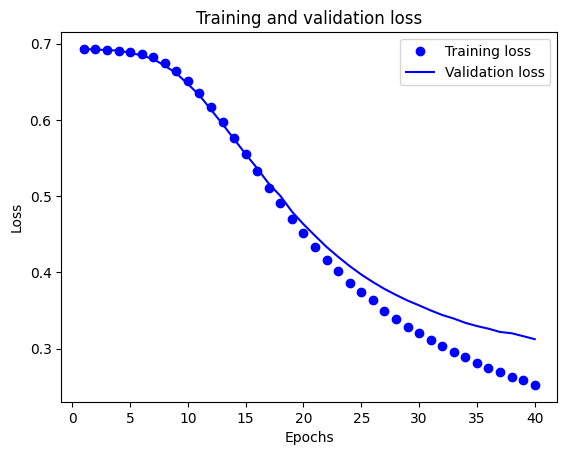

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

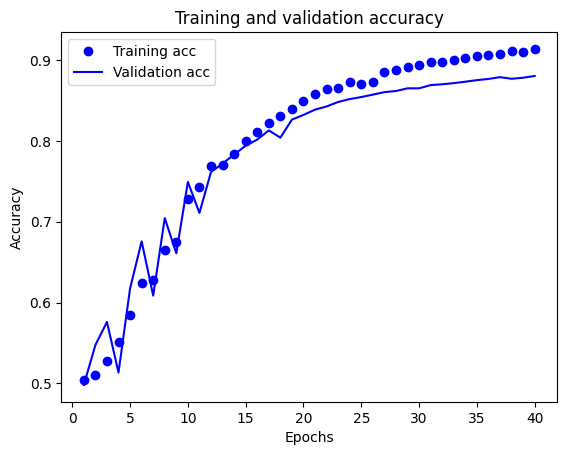

In [29]:
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 순환 신경망을 이용한 예제

자연어 처리를 할 때, sequence로 표현되는 문장의 특성 상 순환 신경망 구조를 가지는 모형을 이용하는 경우가 많다.

문장에는 문자나 단어의 순서가 있으며, 순환 신경망 구조는 이러한 순서 정보를 잘 처리할 수 있기 때문이다.

아래에서는 셰익스피어의 작품 중 일부를 활용하여 자연어 처리를 하는 예제를 살펴본다.

In [120]:
shakespeare_url = "https://homl.info/shakespeare" # shortcut URL
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

In [121]:
# 일부를 선택하여 출력
shakespeare_text[2000:2500]

"itizen:\nSoft! who comes here?\n\nSecond Citizen:\nWorthy Menenius Agrippa; one that hath always loved\nthe people.\n\nFirst Citizen:\nHe's one honest enough: would all the rest were so!\n\nMENENIUS:\nWhat work's, my countrymen, in hand? where go you\nWith bats and clubs? The matter? speak, I pray you.\n\nFirst Citizen:\nOur business is not unknown to the senate; they have\nhad inkling this fortnight what we intend to do,\nwhich now we'll show 'em in deeds. They say poor\nsuitors have strong breaths: they shall k"

다운받은 자료는 실제 영어 문장으로 되어 있기 때문에, [`keras.preprocessing.text.Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)를 이용하여 단어 혹은 문자들을 정수 체계로 변환할 수 있다.

아래에서는 `char_level=True`로 하여 문자를 정수로 변환한다. 이러한 방법은 문장을 문자 단위로 처리할 때 유용하다.

In [122]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(shakespeare_text)

자료가 다소 방대하여 훈련에 시간이 오래 걸리기 때문에 일부만을 선택하여 분석을 진행하겠다.

만약 시간이 넉넉하다면 전체 데이터 셋으로 훈련해도 된다.

In [123]:
shakespeare_text = shakespeare_text[:30000]

`tokenizer.texts_to_sequences`는 텍스트 데이터를 정수 시퀀스로 변환하는 역할을 한다.

In [124]:
tokenizer.texts_to_sequences(["First"])

[[20, 6, 9, 8, 3]]

`tokenizer.sequences_to_texts`는 정수 시퀀스를 텍스트 데이터로 변환한다.

In [125]:
tokenizer.sequences_to_texts([[20, 6, 9, 8, 3]])

['f i r s t']

In [126]:
max_id = len(tokenizer.word_index) # number of distinct characters
dataset_size = tokenizer.document_count

모든 문장의 글자들을 정수 리스트로 변환한 후, numpy array로 변환한다.

`-1`을 취하는 것은 정수값을 0부터 시작하게 하기 위함이다.

In [127]:
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

In [128]:
encoded.shape, encoded[:10]

((30000,), array([19,  5,  8,  7,  2,  0, 18,  5,  2,  5]))

`tf.data.Dataset.from_tensor_slices`를 이용하여 데이터를 보다 활용하기 쉽도록 만들겠다.

이 메세드를 통해 데이터를 변환하면, 추후에 `window`, `batch`, `shuffle` 등 다양한 데이터셋 변환 메서드를 활용하여 데이터를 이차적으로 변환하여 사용하기 쉽다.

In [129]:
train_size = dataset_size * 90 // 100  # 90%는 훈련 세트
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

아래 코드에서는 시퀀스 데이터를 윈도우(window)로 나누는 작업을 수행한다.

즉, 긴 문자열을 101개 길이의 작은 문자열들로 잘라낸다.

- 여기서 마지막 문자는 target variable의 역할을 하고, 앞의 100개의 문자는 feature 변수의 역할을 할 것이다.

In [130]:
n_steps = 100
window_length = n_steps + 1 # target = input shifted 1 character ahead
dataset = dataset.window(window_length, shift=1, drop_remainder=True)

간단히 출력하여 확인해 보자.
데이터의 구조를 보여주기 위해 강제로 대골호 기호를 추가하였따.

In [131]:
for window in dataset.take(3):
    print("[", end="")
    for element in window:
        print("[", end="")
        print(element.numpy(), end="] ")
    print("]")
    print()

[[19] [5] [8] [7] [2] [0] [18] [5] [2] [5] [35] [1] [9] [23] [10] [21] [1] [19] [3] [8] [1] [0] [16] [1] [0] [22] [8] [3] [18] [1] [1] [12] [0] [4] [9] [15] [0] [19] [13] [8] [2] [6] [1] [8] [17] [0] [6] [1] [4] [8] [0] [14] [1] [0] [7] [22] [1] [4] [24] [26] [10] [10] [4] [11] [11] [23] [10] [7] [22] [1] [4] [24] [17] [0] [7] [22] [1] [4] [24] [26] [10] [10] [19] [5] [8] [7] [2] [0] [18] [5] [2] [5] [35] [1] [9] [23] [10] [15] [3] [13] [0] ]

[[5] [8] [7] [2] [0] [18] [5] [2] [5] [35] [1] [9] [23] [10] [21] [1] [19] [3] [8] [1] [0] [16] [1] [0] [22] [8] [3] [18] [1] [1] [12] [0] [4] [9] [15] [0] [19] [13] [8] [2] [6] [1] [8] [17] [0] [6] [1] [4] [8] [0] [14] [1] [0] [7] [22] [1] [4] [24] [26] [10] [10] [4] [11] [11] [23] [10] [7] [22] [1] [4] [24] [17] [0] [7] [22] [1] [4] [24] [26] [10] [10] [19] [5] [8] [7] [2] [0] [18] [5] [2] [5] [35] [1] [9] [23] [10] [15] [3] [13] [0] [4] ]

[[8] [7] [2] [0] [18] [5] [2] [5] [35] [1] [9] [23] [10] [21] [1] [19] [3] [8] [1] [0] [16] [1] [0] [22] 

다음 코드를 통하여 데이터를 flat화 및 배치화하겠다.

In [132]:
dataset = dataset.flat_map(lambda window: window.batch(window_length))

In [133]:
for window in dataset.take(3):
    print(window)

tf.Tensor(
[19  5  8  7  2  0 18  5  2  5 35  1  9 23 10 21  1 19  3  8  1  0 16  1
  0 22  8  3 18  1  1 12  0  4  9 15  0 19 13  8  2  6  1  8 17  0  6  1
  4  8  0 14  1  0  7 22  1  4 24 26 10 10  4 11 11 23 10  7 22  1  4 24
 17  0  7 22  1  4 24 26 10 10 19  5  8  7  2  0 18  5  2  5 35  1  9 23
 10 15  3 13  0], shape=(101,), dtype=int32)
tf.Tensor(
[ 5  8  7  2  0 18  5  2  5 35  1  9 23 10 21  1 19  3  8  1  0 16  1  0
 22  8  3 18  1  1 12  0  4  9 15  0 19 13  8  2  6  1  8 17  0  6  1  4
  8  0 14  1  0  7 22  1  4 24 26 10 10  4 11 11 23 10  7 22  1  4 24 17
  0  7 22  1  4 24 26 10 10 19  5  8  7  2  0 18  5  2  5 35  1  9 23 10
 15  3 13  0  4], shape=(101,), dtype=int32)
tf.Tensor(
[ 8  7  2  0 18  5  2  5 35  1  9 23 10 21  1 19  3  8  1  0 16  1  0 22
  8  3 18  1  1 12  0  4  9 15  0 19 13  8  2  6  1  8 17  0  6  1  4  8
  0 14  1  0  7 22  1  4 24 26 10 10  4 11 11 23 10  7 22  1  4 24 17  0
  7 22  1  4 24 26 10 10 19  5  8  7  2  0 18  5  2  5 35  1  9 23 10 15
 

아래 코드는 데이터 전처리 단계로 데이터를 랜덤하게 섞고, batch로 형성한다.

In [134]:
batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)

In [135]:
for window in dataset.take(2):
    print(window)

tf.Tensor(
[[ 0  8  4 ... 16  1  8]
 [ 7 17  0 ...  0 18  5]
 [ 0  8  1 ...  0  7  3]
 ...
 [ 7  2  0 ... 11 11 15]
 [ 8  7  2 ...  6  1  4]
 [10 10 19 ... 11  1 23]], shape=(32, 101), dtype=int32)
tf.Tensor(
[[22  0 15 ...  6  1  5]
 [ 6  0 14 ...  1  9  1]
 [10 16  1 ... 11  1  4]
 ...
 [ 1  4  8 ... 11  5 25]
 [ 5  2  5 ... 10  2  6]
 [ 9  7  2 ...  4  7  0]], shape=(32, 101), dtype=int32)


아래 코드는  데이터를 입력과 타겟으로 나눈다.

- `windows[:, :-1]`는 각 시퀀스의 마지막 값을 제외한 모든 값을 선택
- `windows[:, 1:]`는 각 시퀀스의 첫 번째 값을 제외한 모든 값을 선택

In [136]:
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [137]:
for window in dataset.take(1):
    print(window)

(<tf.Tensor: shape=(32, 100), dtype=int32, numpy=
array([[ 0, 16,  5, ...,  9,  2,  0],
       [13,  7, 23, ...,  9,  7,  1],
       [12,  3,  9, ...,  0, 18,  5],
       ...,
       [14, 13, 11, ..., 17, 10,  3],
       [ 0,  4,  2, ..., 12,  0, 18],
       [ 0,  4,  9, ...,  6,  4,  2]])>, <tf.Tensor: shape=(32, 100), dtype=int32, numpy=
array([[16,  5,  9, ...,  2,  0,  3],
       [ 7, 23, 10, ...,  7,  1, 11],
       [ 3,  9,  1, ..., 18,  5,  2],
       ...,
       [13, 11,  4, ..., 10,  3, 19],
       [ 4,  2,  0, ...,  0, 18,  5],
       [ 4,  9, 12, ...,  4,  2,  0]])>)


아래에서는 입력 데이터를 one-hot 벡터로 변환하는 작업을 수행한다. 

In [138]:
dataset = dataset.map(lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

In [139]:
for window in dataset.take(1):
    print(window)

(<tf.Tensor: shape=(32, 100, 39), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0.

다음 코드는 데이터 처리의 효율을 위한 것으로, 훈련 동안 다음 차례의 배치를 미리 준비하는 역할을 한다.

In [140]:
dataset = dataset.prefetch(1)

LSTM을 이용한 모형을 설정하고 훈련하자.

In [141]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, return_sequences=True, input_shape=[None, max_id], dropout=0.2, recurrent_dropout=0.2),
    keras.layers.LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id, activation="softmax"))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
history = model.fit(dataset, epochs=20)

Epoch 1/20
935/935 [==============================] - 144s 144ms/step - loss: 2.8150
Epoch 2/20
935/935 [==============================] - 148s 156ms/step - loss: 2.4162
Epoch 3/20
935/935 [==============================] - 144s 152ms/step - loss: 2.2900
Epoch 4/20
935/935 [==============================] - 147s 155ms/step - loss: 2.1973
Epoch 5/20
935/935 [==============================] - 144s 152ms/step - loss: 2.1164
Epoch 6/20
935/935 [==============================] - 145s 153ms/step - loss: 2.0525
Epoch 7/20
935/935 [==============================] - 145s 153ms/step - loss: 2.0021
Epoch 8/20
935/935 [==============================] - 147s 155ms/step - loss: 1.9617
Epoch 9/20
935/935 [==============================] - 146s 154ms/step - loss: 1.9321
Epoch 10/20
935/935 [==============================] - 145s 153ms/step - loss: 1.9089
Epoch 11/20
935/935 [==============================] - 144s 152ms/step - loss: 1.8911
Epoch 12/20
935/935 [==============================] - 143s 151

훈련된 결과를 간단히 확인해 보자.

다음의 `preprocess` 함수는 텍스트를 입력 받아, 신경망에 입력할 수 있도록 변환한다.

최종적으로 문자열을 one-hot 코딩된 값들로 변환한다.

In [142]:
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

"How are yo"의 다음 글자를 예측해 보자.

이를 위해 "How are yo"를 preprocessing하여 훈련된 모형에 입력한다.

출력 결과는 100개의 값이 나타나며, 이 중의 가장 마지막 값이 예측 대상이므로 `[0, -1]`를 선택하였다.

출력 결과는 각 글자에 대한 확률값이므로, `np.argmax`를 사용하여 해당 글자의 인덱스 번호를 찾아낸다.

`tokenizer.sequences_to_texts`는 이 값을 다시 문자로 바꾸어준다.

In [143]:
X_new = preprocess(["How are yo"])
y_proba = model.predict(X_new)[0, -1]
y_pred = np.argmax(y_proba)
tokenizer.sequences_to_texts([[y_pred + 1]])

1/1 [==============================] - 1s 521ms/step


['u']

In [144]:
X_new = preprocess(["To be or not to b"])
y_proba = model.predict(X_new)[0, -1]
y_pred = np.argmax(y_proba)
tokenizer.sequences_to_texts([[y_pred + 1]])

1/1 [==============================] - 1s 519ms/step


['e']